In [140]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import xgboost as xgb
from imblearn.over_sampling import SMOTE  

этот файл идентичен основному за исключением того что тут я смотрю что делает библиотека imblearn 
я не особо разбирался может гдето ошибка в моем использовании но результат ухудшился :)

In [141]:
trein = pd.read_csv("train.csv")
test = pd.read_csv("valid.csv")
# test = test[test['target'] != 0]

# mask = test['target'] == 0
# first_one_index = test[mask].index[2] if mask.any() else None

# if first_one_index is not None:
#     df = test[~mask | (test.index == first_one_index)]

# zero_rows = test[test['target'] == 0]
# zero_rows = zero_rows.head(66)
# other_rows = test[test['target'] != 0]
# test = pd.concat([zero_rows, other_rows])
# test = test.reset_index(drop=True)



C:\Users\josha\AppData\Local\Temp\ipykernel_23860\2601265640.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

In [142]:
trein.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB


In [143]:
threshold = 0.60
ydal = int(len(trein) * (1 - threshold))
df_tren = trein.dropna(axis=1,thresh=ydal)
df_tren

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [144]:
ydal = int(len(test) * (1 - threshold))
df_test = test.dropna(axis=1,thresh=ydal)
df_test

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,4981252.0,4981252.0,4981252.0,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,11789500.0,11789500.0,11789500.0,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,10391000.0,10391000.0,10391000.0,362.0,362.0,362.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,2023-04-01,4366,0,0,f09fe48f-50b4-446a-b071-6904bbd1a847,0.0,0.0,0.0,0.0,0.0,...,3500000.0,3500000.0,3500000.0,360.0,360.0,360.0,3500000.0,3500000.0,3500000.0,0.256261
3638,2023-04-01,8298,0,0,f44867e9-7bbe-4ccd-8711-673023bd8a41,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3639,2023-03-01,835,0,0,f61af6dd-25ed-4659-8645-6101bd834f93,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256919
3640,2023-03-01,8300,0,0,f7f49246-171a-ed11-b823-005056b8a72c,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


In [145]:
df_tr = df_tren.loc[:, ~df_tren.T.duplicated()]
df_tr

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [146]:
summ_tr = df_tr.isnull().sum()
summ_train = summ_tr[summ_tr > 0]
print(f"количество пропусков в train \n{summ_train}\n")




количество пропусков в train 
col1454       1
col1455    3337
col1456    3337
col1457    3337
col1458    3337
           ... 
col2655    8249
col2656    8249
col2660    6420
col2661    6420
col2662    6420
Length: 186, dtype: int64



In [147]:
df_sor = df_tr.sort_values(by='client_id', ascending=False)
db = df_sor['client_id'].value_counts()[df_sor['client_id'].value_counts() > 1].index
dubl_ = db.tolist()
print("Дублирующиеся значения client_id:", dubl_)
df_tr = df_sor[df_sor.duplicated('client_id', keep='first') == False]

df_tr.info()



Дублирующиеся значения client_id: [50, 806, 615, 1559, 49, 663, 105, 2185, 1750, 4645, 2256, 1973, 434, 70, 766, 3691, 264, 3302, 1584, 1943, 1542, 3345, 491, 4494, 2041, 1810, 2010, 3462, 1695, 498, 3385, 641, 2763, 2098, 4383, 359, 258, 670, 1190, 3070, 2883, 897, 2967, 2773, 1491, 3131, 2753, 1276, 613, 1435, 595, 559, 1260, 650, 1015, 1185, 588, 2712, 3186, 176, 916, 1003, 944, 990, 1179, 32, 844, 970, 2900, 2991, 2974, 1795, 552, 4916, 461, 568, 4042, 197, 1849, 1944, 1866, 2600, 1791, 4784, 1708, 2289, 387, 2194, 401, 362, 274, 276, 2371, 2368, 248, 3793, 3785, 2433, 3544, 2304, 291, 2389, 3585, 321, 2817, 2476, 205, 776, 24, 64, 42, 69, 433, 762, 761, 6288, 443, 46, 856, 4000, 53, 1722, 2923, 872, 6160, 3045, 1693, 4735, 3061, 526, 2092, 536, 4127, 1638, 828, 4846, 797, 554, 3257, 3746, 307, 3286, 3488, 231, 233, 3143, 541, 3645, 3654, 1448, 283, 285, 1449, 1427, 1379, 4073, 1523, 2300, 2302, 1386, 1373, 3777, 4272, 1967, 246, 3627, 1349, 1275, 2711, 3682, 177, 271, 2313, 1907, 

In [148]:
common_columns = df_tr.columns.intersection(test.columns)
df1_tr = df_tr[common_columns]
df1_ts = test[common_columns]
df1_tr.info()
df1_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 4718
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 7.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 5.3+ MB


ПОКА ТАК ОСТАЛЬНОЕ НАДО ДОДЕЛАТЬ ПОЛУТШЕ ЧЕМ СЕЙЧАС ПОЙДЕТ

In [149]:
for col in df1_tr.columns:
    if df1_tr[col].dtype == 'object':
        mode_value = df1_tr[col].mode()[0]
    else:
        mode_value = df1_tr[col].mode()[0]
    df1_tr[col].fillna(mode_value, inplace=True)

df22 = df1_ts.fillna(df1_ts.median(numeric_only=True))



C:\Users\josha\AppData\Local\Temp\ipykernel_23860\1687399673.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_tr[col].fillna(mode_value, inplace=True)
C:\Users\josha\AppData\Local\Temp\ipykernel_23860\1687399673.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [150]:
df1_tr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 4718
Columns: 191 entries, report_date to col2663
dtypes: float64(186), int64(3), object(2)
memory usage: 7.1+ MB


In [151]:
label_en = LabelEncoder()
for col in df1_tr.select_dtypes(include=['object']).columns:
    df1_tr[col] = label_en.fit_transform(df1_tr[col])
for col in df1_ts.select_dtypes(include=['object']).columns:
    df1_ts[col] = label_en.fit_transform(df1_ts[col])

C:\Users\josha\AppData\Local\Temp\ipykernel_23860\2440388757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_ts[col] = label_en.fit_transform(df1_ts[col])
C:\Users\josha\AppData\Local\Temp\ipykernel_23860\2440388757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_ts[col] = label_en.fit_transform(df1_ts[col])


In [152]:
print(df1_ts.head(3))
print()
print(df1_tr.head(3))

   report_date  client_id  target  col1453  col1454  col1455  col1456  \
0            1          2       0        0       16      0.0      0.0   
1            2          4       0        0       18      0.0      0.0   
2            2          9       0        0       93      0.0      0.0   

   col1457  col1458  col1459  ...  col2588  col2589  col2590     col2654  \
0      0.0      0.0      0.0  ...    240.0    240.0    240.0   4941670.0   
1      1.0      1.0      1.0  ...    360.0    360.0    360.0  11789500.0   
2      0.0      0.0      0.0  ...    348.0    348.0    348.0   7000000.0   

      col2655     col2656     col2660     col2661     col2662   col2663  
0   4941670.0   4941670.0   4941670.0   4941670.0   4941670.0  0.256919  
1  11789500.0  11789500.0  11789500.0  11789500.0  11789500.0  0.267221  
2   7000000.0   7000000.0   7000000.0   7000000.0   7000000.0  0.257217  

[3 rows x 191 columns]

       report_date  client_id  target  col1453  col1454  col1455  col1456  \
1444

In [153]:
threshold = 0.1
ne_kor = df1_tr.columns[(df1_tr.abs() < threshold).all()]
corr_data = df1_tr[ne_kor]

print(corr_data)

       col1471  col1479  col1495  col1511  col1520  col1521  col2503
14446      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14434      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14417      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14391      0.0      0.0      0.0      0.0      0.0      0.0      0.0
14368      0.0      0.0      0.0      0.0      0.0      0.0      0.0
...        ...      ...      ...      ...      ...      ...      ...
3          0.0      0.0      0.0      0.0      0.0      0.0      0.0
4104       0.0      0.0      0.0      0.0      0.0      0.0      0.0
1          0.0      0.0      0.0      0.0      0.0      0.0      0.0
13554      0.0      0.0      0.0      0.0      0.0      0.0      0.0
4718       0.0      0.0      0.0      0.0      0.0      0.0      0.0

[4817 rows x 7 columns]


In [154]:
columns_to_drop =  ['col1471', 'col1479' , 'col1495' , 'col1511', 'col1520', 'col1521', 'col2503']
df1_tr = df1_tr.drop(columns=columns_to_drop, axis=1)
df1_ts = df1_ts.drop(columns=columns_to_drop, axis=1)
df1_tr.info()
df1_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 14446 to 4718
Columns: 184 entries, report_date to col2663
dtypes: float64(179), int64(5)
memory usage: 6.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 184 entries, report_date to col2663
dtypes: float64(179), int64(5)
memory usage: 5.1 MB


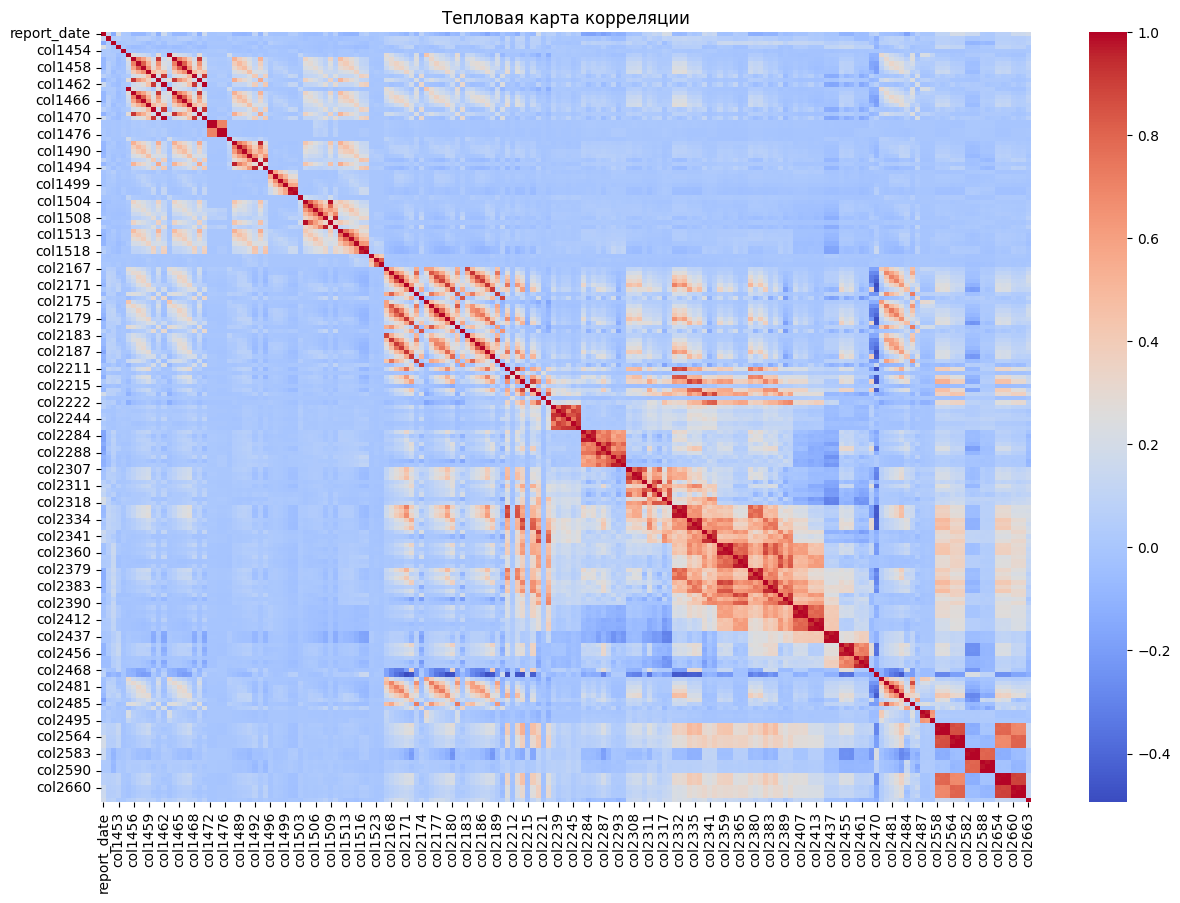

In [155]:
correlation_matrix = df1_tr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Тепловая карта корреляции')
plt.show()

In [156]:

column_name = 'target' 
count_ones = df1_tr[column_name].sum()
total_rows = df1_tr[column_name].count()
percentage_ones = (count_ones / total_rows) * 100

print(f"Количество 1 в колонке '{column_name}': {count_ones}")
print(f"Процент 1 в колонке '{column_name}': {percentage_ones:.2f}%")

Количество 1 в колонке 'target': 149
Процент 1 в колонке 'target': 3.09%


In [157]:

columnss = 'target' 
count_one = df1_ts[columnss].sum()
total_row = df1_ts[columnss].count()
percentage_one = (count_one / total_row) * 100

print(f"Количество 1 в колонке '{columnss}': {count_one}")
print(f"Процент 1 в колонке '{columnss}': {percentage_one:.2f}%")

Количество 1 в колонке 'target': 66
Процент 1 в колонке 'target': 1.81%


In [158]:
X_train = df1_tr.drop(columns=['target'])
y_train = df1_tr['target']

X_val = df1_ts.drop(columns=['target'])
y_val = df1_ts['target']


Толька ради забавы когда делаешь в тэстовых данных 50 на 50 резулитат меняется не сильно на 4% результат где 50 на 50 = 70%

ну уже не хуже главное не трогать файл vaild ато он больно кусается на 10%

In [159]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

C:\Users\josha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\josha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  w

In [160]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Количество')

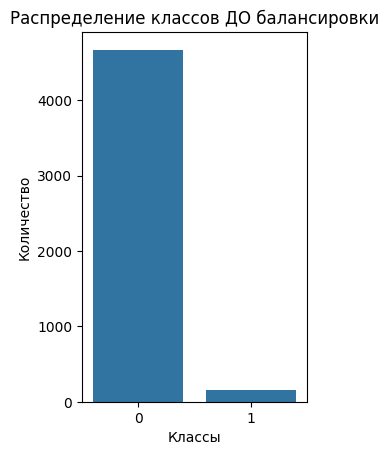

In [161]:
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Распределение классов ДО балансировки')
plt.xlabel('Классы')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

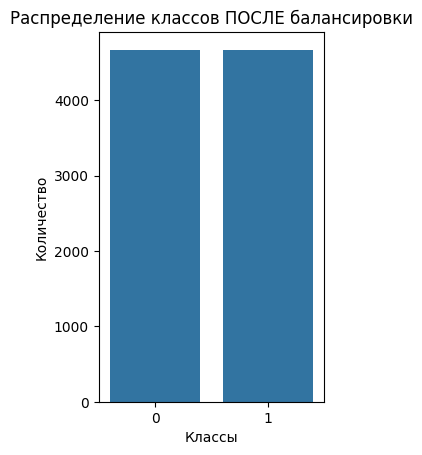

In [162]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title('Распределение классов ПОСЛЕ балансировки')
plt.xlabel('Классы')
plt.ylabel('Количество')

In [163]:
dtrain = xgb.DMatrix(X_train_balanced, label=y_train_balanced)
dval = xgb.DMatrix(X_val, label=y_val)


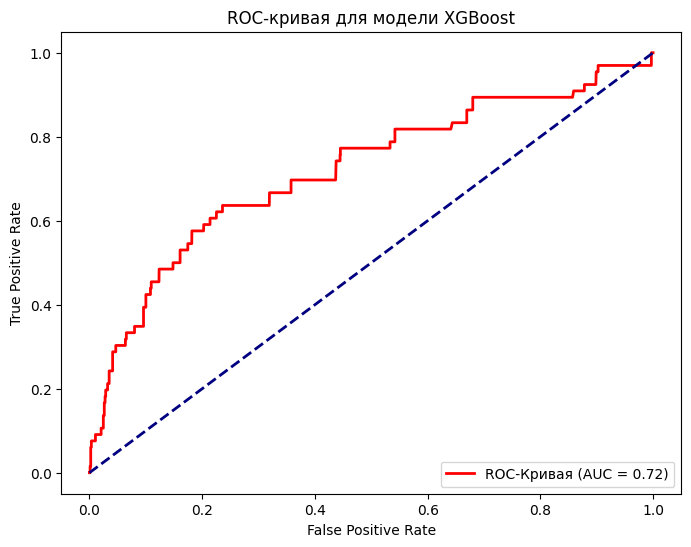

In [164]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 1,
    'learning_rate': 0.2,
    'random_state': 1
}
num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)
y_prob = model.predict(dval)

# ROC-кривая
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower right')
plt.show()